<a href="https://colab.research.google.com/github/ioadeer/bi-bycing-ba-2021/blob/main/Test_de_duracion_de_recorridos_bicis_2020_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar de Google drive

In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth

from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
import os
import sys

import urllib.request
# from zipfile import ZipFile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

mpl.rcParams.update( mpl.rcParamsDefault ) 

In [4]:
!pip install tpot
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from tpot.export_utils import set_param_recursive

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


##Test de csv de recorridos 2020-2021

Informacion agregada:
- Working day
- Temperatura

In [5]:
'''
https://drive.google.com/file/d/1VJso76gFxHN4bP7uIFH0bxn3vTZGaBC1/view?usp=sharing
'''
id = '1FYOKZGHu630fnvv-a_li1e4b_Ovj-a5I'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('recorridos-2020-2021-06-22-2021.csv') 
bicis_recorridos_2020_2021_df = pd.read_csv('recorridos-2020-2021-06-22-2021.csv')
bicis_recorridos_2020_2021_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,duracion_recorrido,id_usuario,fecha_origen_recorrido,fecha_destino_recorrido,start_datetime,anio,nmes,mes,ndia,dia,wdia,hora,mins,id_estacion_destino,nombre_estacion_destino,id_estacion_origen,nombre_estacion_origen,dia_habil,PRCP,TAVG
0,0,0,6563,506009,2020-01-01 00:02:50,2020-01-01 01:52:13,2020-01-01 00:02:50,2020,1,jan,1,wed,3,0,2,30,peña,30,peña,1,0.0,22.8
1,1,0,1150,116847,2020-01-01 00:04:19,2020-01-01 00:23:29,2020-01-01 00:04:19,2020,1,jan,1,wed,3,0,4,123,armenia,159,fitz roy & gorriti,1,0.0,22.8
2,2,0,383,259973,2020-01-01 00:05:23,2020-01-01 00:11:46,2020-01-01 00:05:23,2020,1,jan,1,wed,3,0,5,255,barrancas de belgrano,251,solar de la abadía,1,0.0,22.8
3,3,0,72,354594,2020-01-01 00:05:42,2020-01-01 00:06:54,2020-01-01 00:05:42,2020,1,jan,1,wed,3,0,5,92,salcedo,92,salcedo,1,0.0,22.8
4,4,0,769,222181,2020-01-01 00:07:30,2020-01-01 00:20:19,2020-01-01 00:07:30,2020,1,jan,1,wed,3,0,7,41,urquiza y rondeau,41,urquiza y rondeau,1,0.0,22.8


In [21]:
bicis_recorridos_2020_2021_df

,Unnamed: 0,id,duracion_recorrido,id_usuario,fecha_origen_recorrido,fecha_destino_recorrido,start_datetime,anio,nmes,mes,ndia,dia,wdia,hora,mins,id_estacion_destino,nombre_estacion_destino,id_estacion_origen,nombre_estacion_origen,dia_habil,PRCP,TAVG
0,0,0,6563,506009,2020-01-01 00:02:50,2020-01-01 01:52:13,2020-01-01 00:02:50,2020,1,jan,1,wed,3,0,2,30,peña,30,peña,1,0.0,22.8
1,1,0,1150,116847,2020-01-01 00:04:19,2020-01-01 00:23:29,2020-01-01 00:04:19,2020,1,jan,1,wed,3,0,4,123,armenia,159,fitz roy & gorriti,1,0.0,22.8
2,2,0,383,259973,2020-01-01 00:05:23,2020-01-01 00:11:46,2020-01-01 00:05:23,2020,1,jan,1,wed,3,0,5,255,barrancas de belgrano,251,solar de la abadía,1,0.0,22.8
3,3,0,72,354594,2020-01-01 00:05:42,2020-01-01 00:06:54,2020-01-01 00:05:42,2020,1,jan,1,wed,3,0,5,92,salcedo,92,salcedo,1,0.0,22.8
4,4,0,769,222181,2020-01-01 00:07:30,2020-01-01 00:20:19,2020-01-01 00:07:30,2020,1,jan,1,wed,3,0,7,41,urquiza y rondeau,41,urquiza y rondeau,1,0.0,22.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310658,3310658,11204919,591,35926,2021-06-02 16:09:32,2021-06-02 16:19:23,2021-06-02 16:09:32,2021,6,jun,153,wed,3,16,9,158,villarroel,129,velasco,1,0.0,14.6
3310659,3310659,11204920,400,713938,2021-06-02 16:09:34,2021-06-02 16:16:14,2021-06-02 16:09:34,2021,6,jun,153,wed,3,16,9,147,constitución,117,humberto 1°,1,0.0,14.6
3310660,3310660,11204928,299,690073,2021-06-02 16:10:08,2021-06-02 16:15:07,2021-06-02 16:10:08,2021,6,jun,153,wed,3,16,10,277,coghlan,252,tamborini,1,0.0,14.6
3310661,3310661,11204938,406,348428,2021-06-02 16:11:01,2021-06-02 16:17:47,2021-06-02 16:11:01,2021,6,jun,153,wed,3,16,11,349,plaza saenz peña,278,donato alvarez,1,0.0,14.6


In [6]:
bicis_recorridos_df = bicis_recorridos_2020_2021_df.drop(['Unnamed: 0'], axis=1)

In [22]:
bicis_recorridos_df

,id,duracion_recorrido,id_usuario,fecha_origen_recorrido,fecha_destino_recorrido,start_datetime,anio,nmes,mes,ndia,dia,wdia,hora,mins,id_estacion_destino,nombre_estacion_destino,id_estacion_origen,nombre_estacion_origen,dia_habil,PRCP,TAVG
0,0,6563,506009,2020-01-01 00:02:50,2020-01-01 01:52:13,2020-01-01 00:02:50,2020,1,jan,1,wed,3,0,2,30,peña,30,peña,1,0.0,22.8
1,0,1150,116847,2020-01-01 00:04:19,2020-01-01 00:23:29,2020-01-01 00:04:19,2020,1,jan,1,wed,3,0,4,123,armenia,159,fitz roy & gorriti,1,0.0,22.8
2,0,383,259973,2020-01-01 00:05:23,2020-01-01 00:11:46,2020-01-01 00:05:23,2020,1,jan,1,wed,3,0,5,255,barrancas de belgrano,251,solar de la abadía,1,0.0,22.8
3,0,72,354594,2020-01-01 00:05:42,2020-01-01 00:06:54,2020-01-01 00:05:42,2020,1,jan,1,wed,3,0,5,92,salcedo,92,salcedo,1,0.0,22.8
4,0,769,222181,2020-01-01 00:07:30,2020-01-01 00:20:19,2020-01-01 00:07:30,2020,1,jan,1,wed,3,0,7,41,urquiza y rondeau,41,urquiza y rondeau,1,0.0,22.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310658,11204919,591,35926,2021-06-02 16:09:32,2021-06-02 16:19:23,2021-06-02 16:09:32,2021,6,jun,153,wed,3,16,9,158,villarroel,129,velasco,1,0.0,14.6
3310659,11204920,400,713938,2021-06-02 16:09:34,2021-06-02 16:16:14,2021-06-02 16:09:34,2021,6,jun,153,wed,3,16,9,147,constitución,117,humberto 1°,1,0.0,14.6
3310660,11204928,299,690073,2021-06-02 16:10:08,2021-06-02 16:15:07,2021-06-02 16:10:08,2021,6,jun,153,wed,3,16,10,277,coghlan,252,tamborini,1,0.0,14.6
3310661,11204938,406,348428,2021-06-02 16:11:01,2021-06-02 16:17:47,2021-06-02 16:11:01,2021,6,jun,153,wed,3,16,11,349,plaza saenz peña,278,donato alvarez,1,0.0,14.6


In [7]:
drop_categorical = ['fecha_origen_recorrido','fecha_destino_recorrido','start_datetime','mes','dia','nombre_estacion_destino','nombre_estacion_origen']
bicis_recorridos_only_num_df = bicis_recorridos_df.drop(drop_categorical,axis=1)

In [24]:
bicis_recorridos_only_num_df.describe()

,id,duracion_recorrido,id_usuario,anio,nmes,ndia,wdia,hora,mins,id_estacion_origen,dia_habil,PRCP,TAVG
count,3.310663e+06,3.310663e+06,3.310663e+06,3.310663e+06,3.310663e+06,3.310663e+06,3.310663e+06,3.310663e+06,3.310663e+06,3.310663e+06,3.310663e+06,3.310663e+06,3.310663e+06
mean,4.117142e+06,1.365052e+03,4.365493e+05,2.020395e+03,6.198127e+00,1.735664e+02,3.022604e+00,1.431481e+01,2.915929e+01,1.526333e+02,7.579989e-01,9.043348e-01,1.958266e+01
std,5.103167e+06,6.281382e+03,2.613479e+05,4.888512e-01,3.877963e+00,1.188325e+02,1.918667e+00,5.292508e+00,1.726890e+01,1.036556e+02,4.282950e-01,5.316299e+00,4.858879e+00
min,0.000000e+00,0.000000e+00,3.700000e+01,2.020000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.600000e+00
25%,0.000000e+00,6.840000e+02,1.747990e+05,2.020000e+03,2.000000e+00,5.900000e+01,1.000000e+00,1.100000e+01,1.400000e+01,7.000000e+01,1.000000e+00,0.000000e+00,1.600000e+01
50%,0.000000e+00,1.096000e+03,4.969780e+05,2.020000e+03,6.000000e+00,1.530000e+02,3.000000e+00,1.500000e+01,2.900000e+01,1.420000e+02,1.000000e+00,0.000000e+00,2.040000e+01
75%,1.022637e+07,1.614000e+03,6.839610e+05,2.021000e+03,1.000000e+01,2.870000e+02,5.000000e+00,1.800000e+01,4.400000e+01,2.270000e+02,1.000000e+00,0.000000e+00,2.350000e+01
max,1.120500e+07,5.513940e+06,7.722650e+05,2.021000e+03,1.200000e+01,3.660000e+02,6.000000e+00,2.300000e+01,5.900000e+01,3.990000e+02,1.000000e+00,6.100000e+01,2.890000e+01


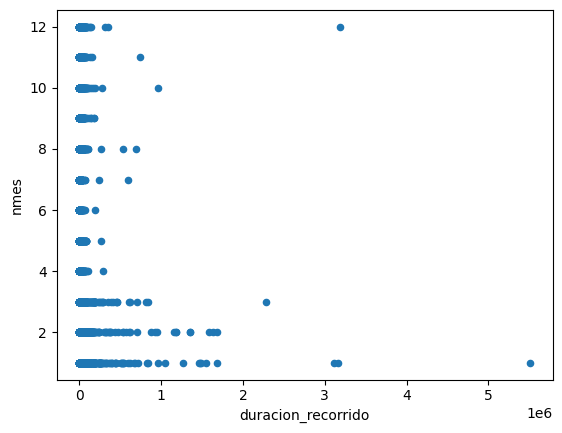

In [ ]:
ax1 = bicis_recorridos_only_num_df.plot(kind='scatter',x='duracion_recorrido', y='nmes')
plt.show()

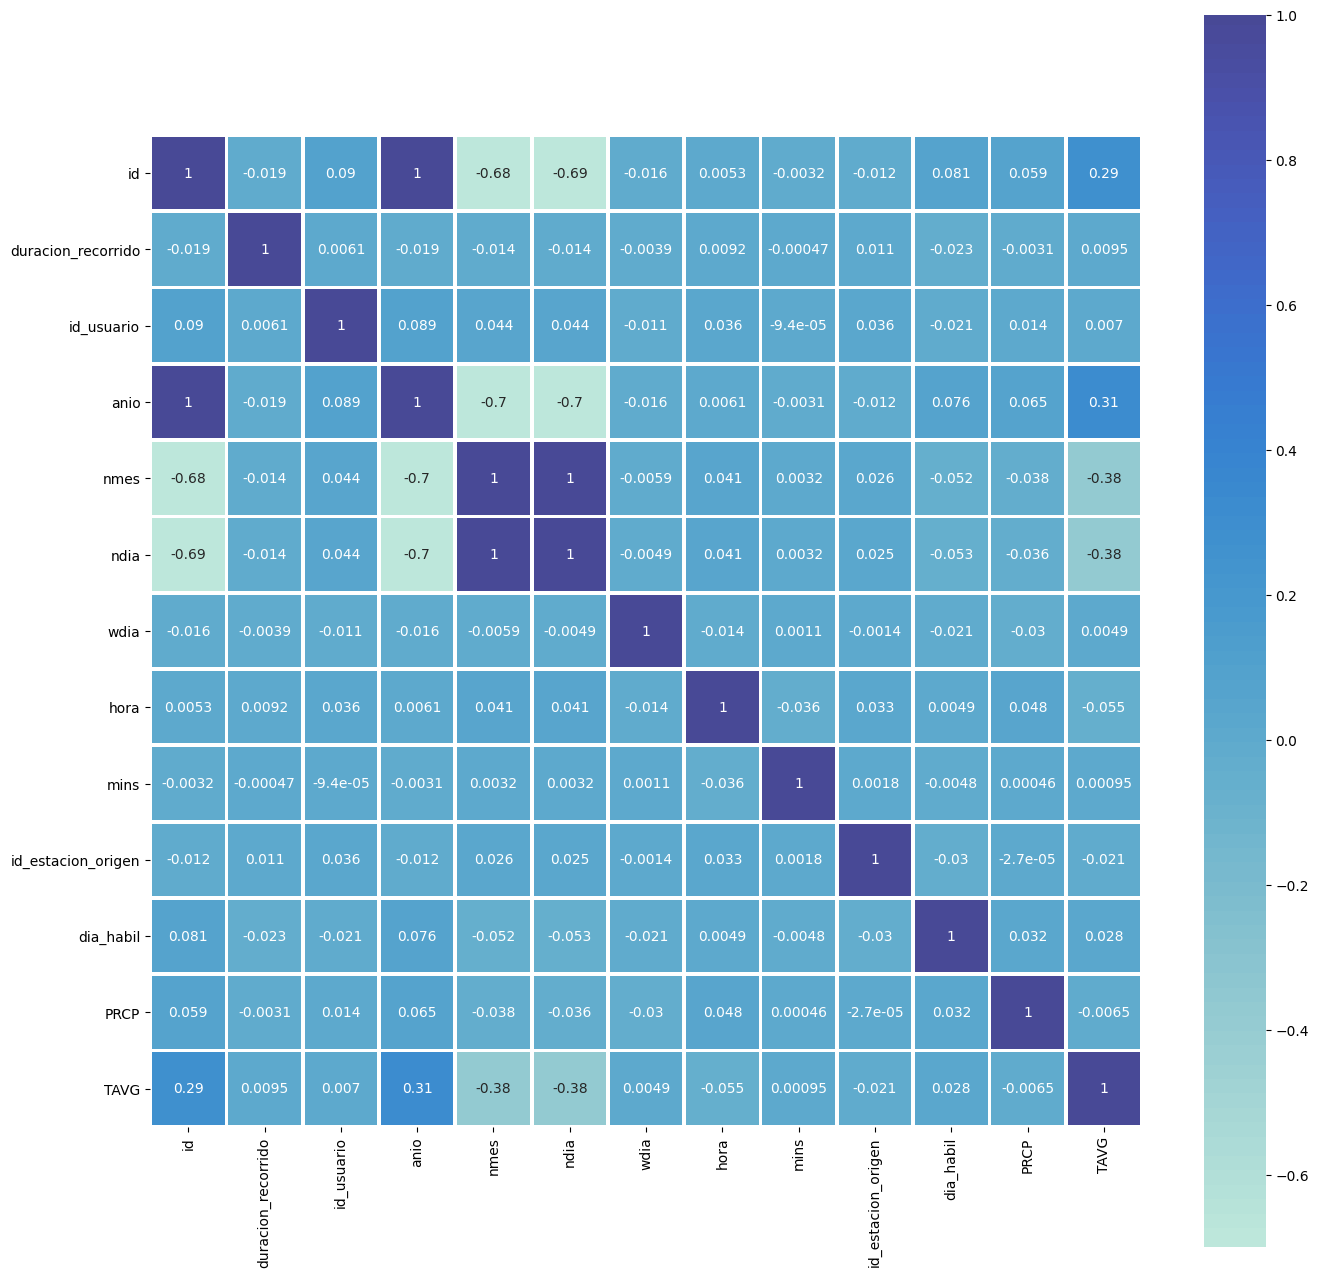

In [20]:
corr =bicis_recorridos_only_num_df.corr()
f,axes = plt.subplots(1,1,figsize = (16,16))
ax1 = sns.heatmap(corr,square=True,annot = True,linewidth = 2,center = 2,ax = axes)
plt.show()

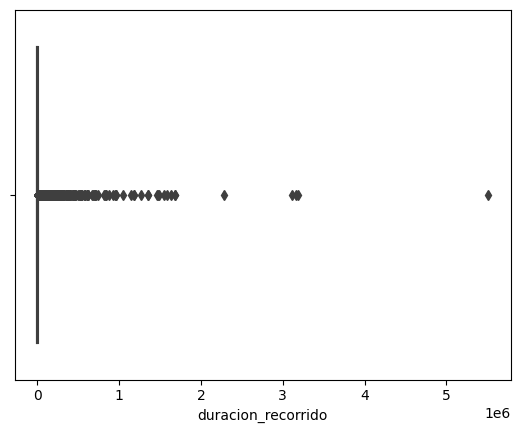

In [25]:
ax1 = sns.boxplot(x=bicis_recorridos_only_num_df['duracion_recorrido'])
plt.show()

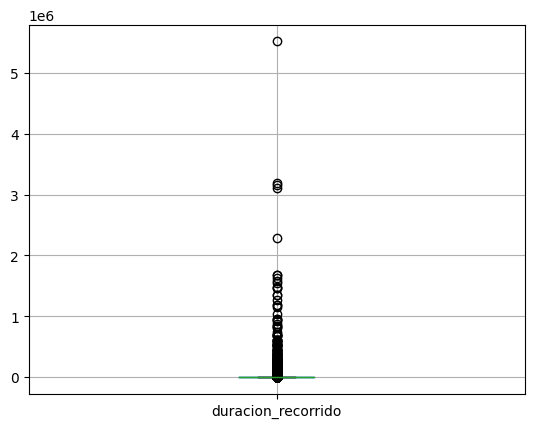

In [30]:
ax1 = bicis_recorridos_only_num_df.boxplot('duracion_recorrido')
plt.show()

In [ ]:
bicis_recorridos_only_num_df['']

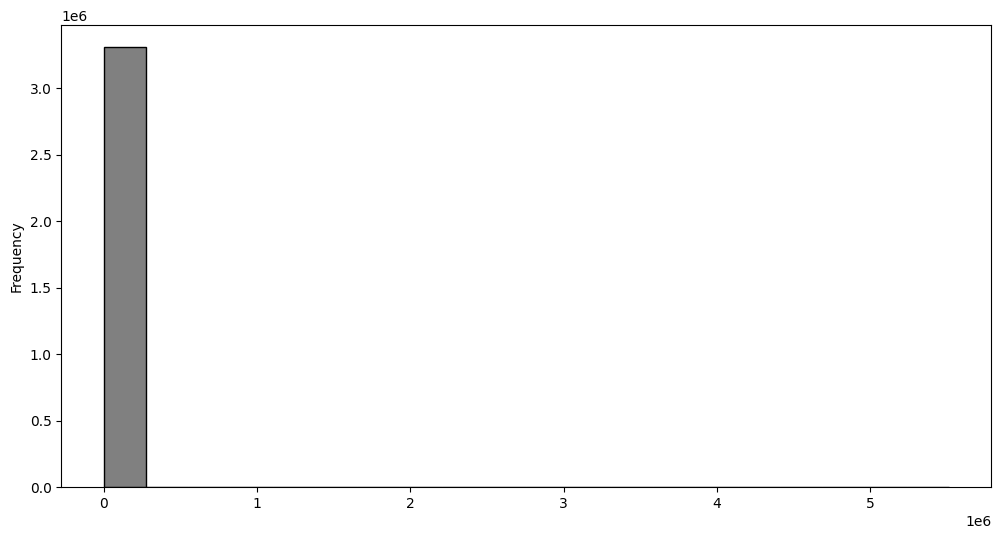

In [29]:
ax = bicis_recorridos_only_num_df['duracion_recorrido'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')
plt.show()

## Evitar viajes que se hayan cancelado
- Filtrar viajes con igual destino e igual origen que una duracion menor a 60 segundos
- Viajes no mas de 5 horas = 18000 seg


In [49]:
bicis_recorridos_only_num_duration_threshold_df = bicis_recorridos_only_num_df[bicis_recorridos_only_num_df['id_estacion_origen'] != bicis_recorridos_2020_2021_df['id_estacion_destino']]
bicis_recorridos_only_num_duration_threshold_df = bicis_recorridos_only_num_duration_threshold_df[bicis_recorridos_only_num_duration_threshold_df['duracion_recorrido']> 60]
bicis_recorridos_only_num_duration_threshold_df = bicis_recorridos_only_num_duration_threshold_df[bicis_recorridos_only_num_duration_threshold_df['duracion_recorrido']< 18000]
bicis_recorridos_only_num_duration_threshold_df

,id,duracion_recorrido,id_usuario,anio,nmes,ndia,wdia,hora,mins,id_estacion_destino,id_estacion_origen,dia_habil,PRCP,TAVG
1,0,1150,116847,2020,1,1,3,0,4,123,159,1,0.0,22.8
2,0,383,259973,2020,1,1,3,0,5,255,251,1,0.0,22.8
6,0,2388,94956,2020,1,1,3,0,8,193,167,1,0.0,22.8
7,0,1280,68357,2020,1,1,3,0,8,190,146,1,0.0,22.8
8,0,990,39087,2020,1,1,3,0,9,111,71,1,0.0,22.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310658,11204919,591,35926,2021,6,153,3,16,9,158,129,1,0.0,14.6
3310659,11204920,400,713938,2021,6,153,3,16,9,147,117,1,0.0,14.6
3310660,11204928,299,690073,2021,6,153,3,16,10,277,252,1,0.0,14.6
3310661,11204938,406,348428,2021,6,153,3,16,11,349,278,1,0.0,14.6


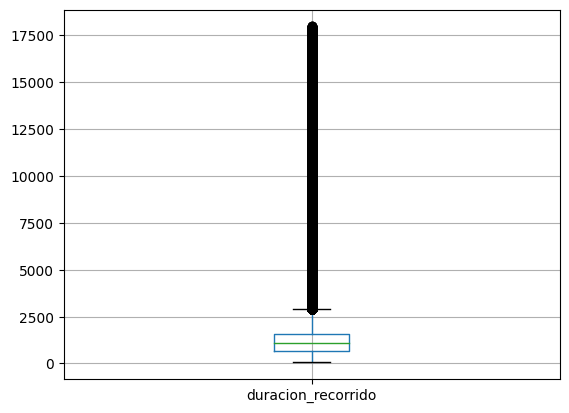

In [50]:
ax1 = bicis_recorridos_only_num_duration_threshold_df.boxplot(column='duracion_recorrido')
plt.show()

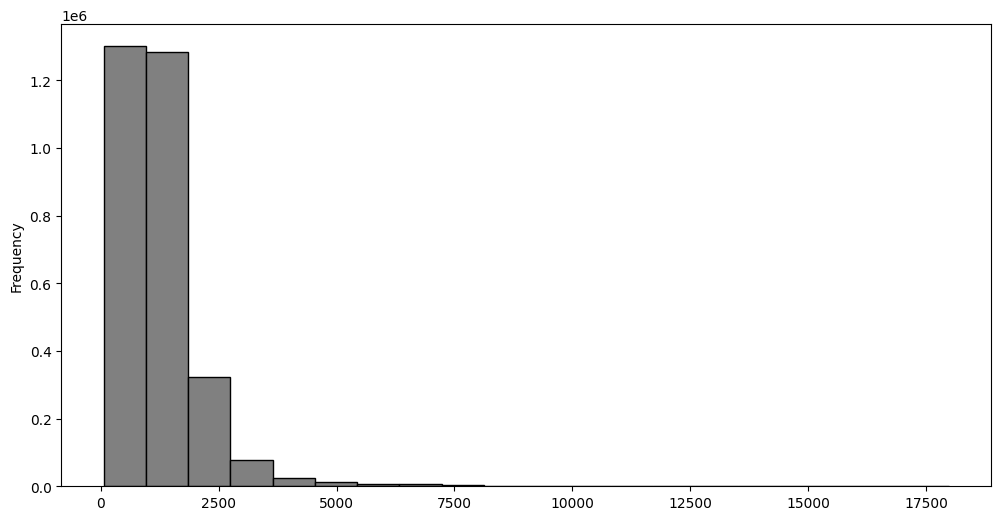

In [52]:
ax = bicis_recorridos_only_num_duration_threshold_df['duracion_recorrido'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')
plt.show()

In [47]:
bicis_recorridos_only_num_duration_threshold_df['duracion_recorrido'].describe()

count    3.052565e+06
mean     1.323212e+03
std      6.041305e+03
min      6.100000e+01
25%      6.880000e+02
50%      1.078000e+03
75%      1.575000e+03
max      5.513940e+06
Name: duracion_recorrido, dtype: float64

## Reduzco duracion
- 5000 segs max, 1 h 40 min aprox

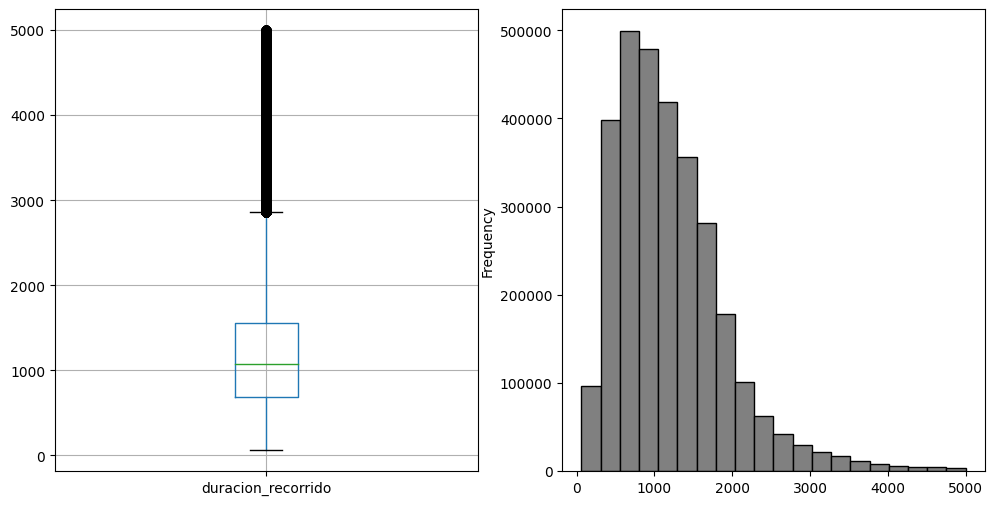

In [55]:
bicis_recorridos_only_num_duration_threshold_5000seg_df = bicis_recorridos_only_num_duration_threshold_df[bicis_recorridos_only_num_duration_threshold_df['duracion_recorrido']< 5000]
plt.subplot(1, 2, 1)
ax1 = bicis_recorridos_only_num_duration_threshold_5000seg_df.boxplot(column='duracion_recorrido')
plt.subplot(1, 2, 2)
ax2 = bicis_recorridos_only_num_duration_threshold_5000seg_df['duracion_recorrido'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')
plt.show()